## Logistic Regression Implementation

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
from sklearn.datasets import make_classification

In [44]:
## create the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

In [45]:
X, y

(array([[ 0.96479937, -0.06644898,  0.98676805, ..., -1.2101605 ,
         -0.62807677,  1.22727382],
        [-0.91651053, -0.56639459, -1.00861409, ..., -0.98453405,
          0.36389642,  0.20947008],
        [-0.10948373, -0.43277388, -0.4576493 , ..., -0.2463834 ,
         -1.05814521, -0.29737608],
        ...,
        [ 1.67463306,  1.75493307,  1.58615382, ...,  0.69272276,
         -1.50384972,  0.22526412],
        [-0.77860873, -0.83568901, -0.19484228, ..., -0.49735437,
          2.47213818,  0.86718741],
        [ 0.24845351, -1.0034389 ,  0.36046013, ...,  0.77323999,
          0.1857344 ,  1.41641179]]),
 array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
   

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [47]:
#model traning
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()


In [48]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [49]:
y_pred = logistic.predict(X_test)
print(y_pred)

[0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1
 1 1 1 0]


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

0.8466666666666667
[[118  17]
 [ 29 136]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



## Hyperparameter tunning and cross validation

In [52]:
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values=[100, 10, 1, .1, .01, .01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']


In [53]:
params = dict(penalty=penalty, C=c_values, solver=solver)

In [54]:
## gridSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=cv, n_jobs=-1)

In [55]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [56]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [57]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [58]:
grid.best_score_

0.8785714285714287

In [59]:
y_pred=grid.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [60]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

0.8533333333333334
[[124  11]
 [ 33 132]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       135
           1       0.92      0.80      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



## Randomised SearchCV

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
randomCV = RandomizedSearchCV(estimator=model,param_distributions=params,cv=5, scoring='accuracy')

In [63]:
randomCV.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1, 0.1, 0.01, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [64]:
randomCV.best_score_

0.8785714285714287

In [65]:
randomCV.best_params_

{'solver': 'sag', 'penalty': 'l2', 'C': 0.01}

In [66]:
y_pred=randomCV.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [67]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

0.8533333333333334
[[124  11]
 [ 33 132]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       135
           1       0.92      0.80      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



## Logistic Regression for multi-class classification

In [68]:
## create the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=3, random_state=42)

In [69]:
X

array([[ 0.7715326 , -1.47433614,  2.19664605, ...,  0.68174341,
         1.08996189,  0.96250289],
       [ 1.85838284, -3.68087983,  0.22749588, ..., -0.47417818,
         1.34113888, -0.77177196],
       [-0.98724764,  1.53916836,  0.5859042 , ..., -0.32202815,
        -1.45103394,  1.32543211],
       ...,
       [-1.227082  ,  1.65602784,  0.47263035, ..., -0.8634936 ,
        -1.83932326, -0.03120349],
       [ 1.28527572, -0.29715202, -0.67172079, ..., -1.31544131,
         2.85446468,  1.3094441 ],
       [-0.75428048,  0.88516075, -1.6728939 , ..., -2.0362205 ,
        -1.43989584,  0.04749347]])

In [70]:
y

array([1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1,
       2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2,
       0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0,
       0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 0, 2,
       1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2,
       1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1,
       0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2,
       2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1,

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [72]:
mClassLogi = LogisticRegression(multi_class='ovr')
mClassLogi.fit(X_train, y_train)
y_pred = mClassLogi.predict(X_test)
y_pred

array([2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 0,
       1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2,
       0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0,
       2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2,
       1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2,
       0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2,
       0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1])

In [73]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

0.68
[[79 16  8]
 [31 38 27]
 [ 3 11 87]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       103
           1       0.58      0.40      0.47        96
           2       0.71      0.86      0.78       101

    accuracy                           0.68       300
   macro avg       0.67      0.67      0.66       300
weighted avg       0.67      0.68      0.66       300



## Logistic Regression for imbalanced dataset

In [74]:
from collections import Counter
from sklearn.datasets import make_classification

In [75]:
X, y = make_classification(n_samples=10000, n_features=2, n_clusters_per_class=1, n_redundant=0, weights=[.99],random_state=10)

In [76]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [77]:
Counter(y)

Counter({0: 9846, 1: 154})

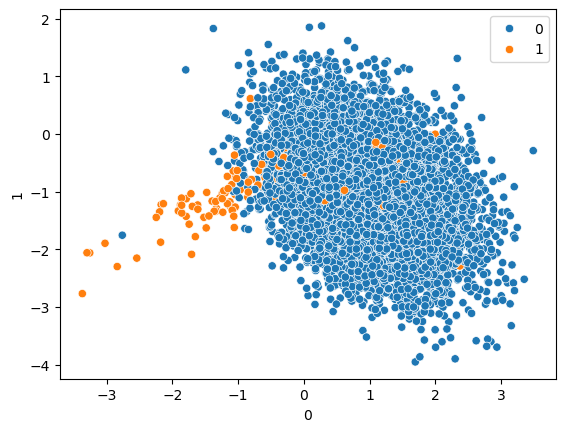

In [78]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)
plt.show()


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
model = LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1,.1,.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = [{0:w, 1:y} for w in [1,20,50,100] for y in [1, 20, 50, 100]]

In [80]:
params = dict(penalty=penalty, C=c_values, solver= solver, class_weight=class_weight)

In [81]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 20},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 20, 1: 1},
  {0: 20, 1: 20},
  {0: 20, 1: 50},
  {0: 20, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 20},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 20},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [82]:
cv = StratifiedKFold()
grid= GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv = 5)

In [83]:
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 20, 1: 50},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

0.9904
[[2465    0]
 [  24   11]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2465
           1       1.00      0.31      0.48        35

    accuracy                           0.99      2500
   macro avg       1.00      0.66      0.74      2500
weighted avg       0.99      0.99      0.99      2500



## Logistic regression with ROC curve and ROC AUC score

In [84]:
from sklearn.metrics import roc_auc_score, roc_curve

In [85]:
## create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [ ]:
# dummy model  (majority class)
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [88]:
model = LogisticRegression();
model.fit(X_train,y_train)

LogisticRegression()

In [93]:
model_prob=model.predict_proba(X_test)

In [94]:
model_prob

array([[6.74190873e-04, 9.99325809e-01],
       [9.19840444e-01, 8.01595557e-02],
       [5.43753925e-01, 4.56246075e-01],
       [1.94320087e-01, 8.05679913e-01],
       [8.96955241e-01, 1.03044759e-01],
       [5.38990241e-01, 4.61009759e-01],
       [1.71352090e-01, 8.28647910e-01],
       [2.90543366e-01, 7.09456634e-01],
       [1.02301813e-01, 8.97698187e-01],
       [1.23538942e-01, 8.76461058e-01],
       [9.99667210e-01, 3.32790214e-04],
       [1.76332587e-01, 8.23667413e-01],
       [8.26464125e-01, 1.73535875e-01],
       [4.77087470e-01, 5.22912530e-01],
       [3.12717643e-01, 6.87282357e-01],
       [1.73398482e-01, 8.26601518e-01],
       [5.54531818e-02, 9.44546818e-01],
       [3.53323048e-01, 6.46676952e-01],
       [8.99702877e-01, 1.00297123e-01],
       [8.02792608e-01, 1.97207392e-01],
       [9.90033818e-01, 9.96618235e-03],
       [5.10780820e-01, 4.89219180e-01],
       [9.88330747e-02, 9.01166925e-01],
       [1.25107454e-03, 9.98748925e-01],
       [8.800607

In [95]:
model_prob=model_prob[:,1]
model_prob

array([9.99325809e-01, 8.01595557e-02, 4.56246075e-01, 8.05679913e-01,
       1.03044759e-01, 4.61009759e-01, 8.28647910e-01, 7.09456634e-01,
       8.97698187e-01, 8.76461058e-01, 3.32790214e-04, 8.23667413e-01,
       1.73535875e-01, 5.22912530e-01, 6.87282357e-01, 8.26601518e-01,
       9.44546818e-01, 6.46676952e-01, 1.00297123e-01, 1.97207392e-01,
       9.96618235e-03, 4.89219180e-01, 9.01166925e-01, 9.98748925e-01,
       1.19939253e-01, 9.65172294e-03, 6.25724165e-01, 9.77606909e-01,
       3.56187875e-02, 1.86042701e-02, 3.57901844e-01, 2.61845696e-02,
       2.32160980e-01, 9.67711850e-01, 5.22332907e-01, 6.53656208e-01,
       1.53772964e-02, 2.56121980e-02, 7.88766865e-01, 2.31590934e-02,
       9.43088035e-01, 8.52350849e-01, 1.33521065e-02, 4.00524634e-04,
       5.30303930e-02, 5.26483686e-02, 9.98623014e-01, 6.50234894e-01,
       9.07343469e-01, 4.30780844e-02, 2.09623419e-02, 2.30408484e-02,
       9.46586259e-02, 5.14534062e-02, 5.68941486e-01, 9.90312178e-01,
      

In [96]:
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc=roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9044392939917989


In [106]:
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, threshold=  roc_curve(y_test, model_prob)

In [107]:
model_fpr

array([0.        , 0.        , 0.        , 0.00632911, 0.00632911,
       0.01265823, 0.01265823, 0.01898734, 0.01898734, 0.02531646,
       0.02531646, 0.03797468, 0.03797468, 0.05063291, 0.05063291,
       0.05696203, 0.05696203, 0.06329114, 0.06329114, 0.06962025,
       0.06962025, 0.07594937, 0.07594937, 0.09493671, 0.09493671,
       0.10126582, 0.10126582, 0.10759494, 0.10759494, 0.11392405,
       0.11392405, 0.12025316, 0.12025316, 0.14556962, 0.14556962,
       0.17088608, 0.17088608, 0.1835443 , 0.1835443 , 0.22151899,
       0.22151899, 0.2278481 , 0.2278481 , 0.23417722, 0.23417722,
       0.31012658, 0.31012658, 0.32911392, 0.32911392, 0.37974684,
       0.37974684, 0.39873418, 0.39873418, 0.42405063, 0.42405063,
       0.5       , 0.5       , 0.53164557, 0.53164557, 0.5443038 ,
       0.5443038 , 0.56329114, 0.56329114, 0.8164557 , 0.8164557 ,
       0.96835443, 0.96835443, 1.        ])

In [108]:
model_tpr

array([0.        , 0.00704225, 0.14084507, 0.14084507, 0.24647887,
       0.24647887, 0.30985915, 0.30985915, 0.36619718, 0.36619718,
       0.38732394, 0.38732394, 0.43661972, 0.43661972, 0.5915493 ,
       0.5915493 , 0.64788732, 0.64788732, 0.66901408, 0.66901408,
       0.68309859, 0.68309859, 0.6971831 , 0.6971831 , 0.70422535,
       0.70422535, 0.71830986, 0.71830986, 0.74647887, 0.74647887,
       0.8028169 , 0.8028169 , 0.80985915, 0.80985915, 0.83098592,
       0.83098592, 0.85211268, 0.85211268, 0.86619718, 0.86619718,
       0.87323944, 0.87323944, 0.9084507 , 0.9084507 , 0.91549296,
       0.91549296, 0.92253521, 0.92253521, 0.92957746, 0.92957746,
       0.94366197, 0.94366197, 0.95070423, 0.95070423, 0.95774648,
       0.95774648, 0.96478873, 0.96478873, 0.97183099, 0.97183099,
       0.97887324, 0.97887324, 0.98591549, 0.98591549, 0.99295775,
       0.99295775, 1.        , 1.        ])

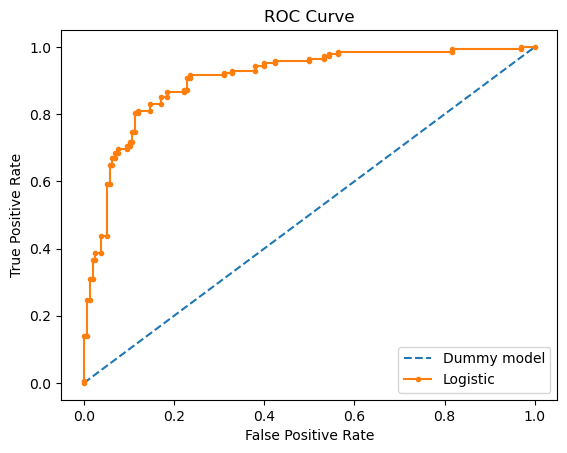

In [109]:
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [110]:
threshold

array([           inf, 9.99841431e-01, 9.90312178e-01, 9.89789604e-01,
       9.69840515e-01, 9.67711850e-01, 9.54350198e-01, 9.49376937e-01,
       9.37595993e-01, 9.36574071e-01, 9.30988369e-01, 9.26229039e-01,
       9.09517229e-01, 9.07343469e-01, 8.43163099e-01, 8.42880786e-01,
       8.23496913e-01, 8.19906654e-01, 8.05679913e-01, 8.03023949e-01,
       7.88766865e-01, 7.83267314e-01, 7.79808524e-01, 7.73542569e-01,
       7.73042351e-01, 7.66533994e-01, 7.59977292e-01, 7.55728997e-01,
       7.38345078e-01, 7.33647339e-01, 6.87282357e-01, 6.53656208e-01,
       6.50234894e-01, 6.25724165e-01, 6.10931389e-01, 5.68941486e-01,
       5.22332907e-01, 5.07118055e-01, 4.88670078e-01, 4.61009759e-01,
       4.59292509e-01, 4.56246075e-01, 4.31124193e-01, 4.28500867e-01,
       4.10339171e-01, 3.16619731e-01, 3.09453767e-01, 3.01031985e-01,
       2.78367698e-01, 1.82394320e-01, 1.77011298e-01, 1.66057291e-01,
       1.49173917e-01, 1.31183339e-01, 1.28392734e-01, 9.46586259e-02,
      

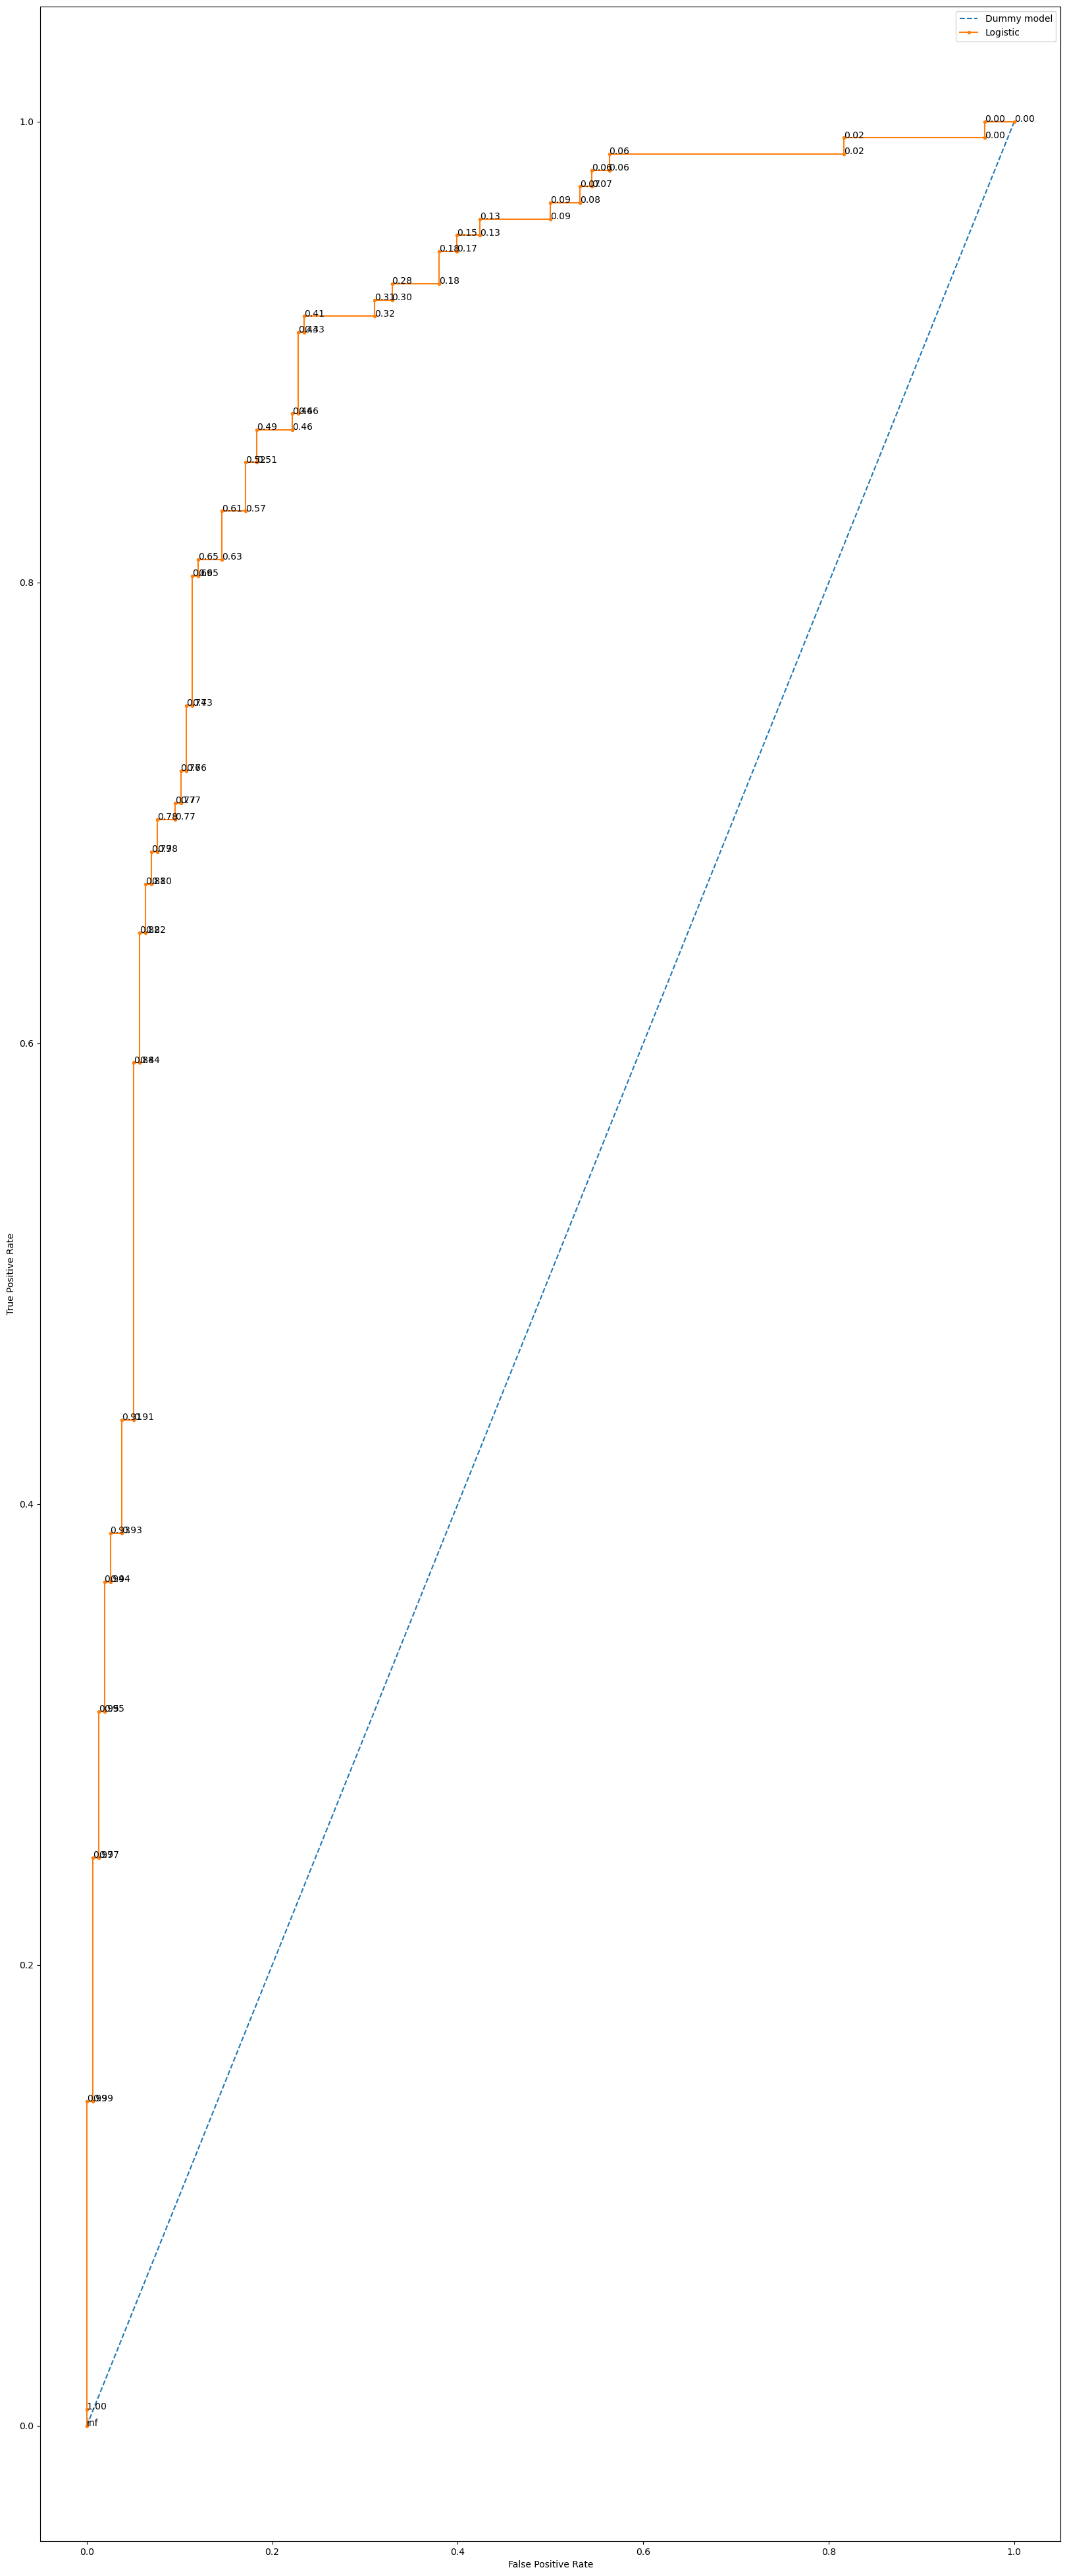

In [119]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(20, 50))  # or any size you like

# plot both curves on the same axes
ax.plot(dummy_fpr, dummy_tpr, linestyle="--", label="Dummy model")
ax.plot(model_fpr, model_tpr, marker=".", label="Logistic")

# annotate each logistic point with its threshold
for fpr, tpr, thr in zip(model_fpr, model_tpr, threshold):
    ax.annotate(f"{thr:.2f}", xy=(fpr, tpr))

# labels and legend
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()
plt.show()
